In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy.integrate import odeint
from statistics import mean

> # Introduction

In this notebook, we will create some graphics and anylize the global situation related to COVID-19. 
We will also create a SIR model for a particular country and different polynomial models.

We will find a training and test dataset where the training data contains information up to March 18, 2020 and the test will be the data to be predicted (predictions till April 23, 2020). There is a week of overlap between training and predicted data, from March 12 to March 22, 2020.

> ### Load the data

First, we will import the training data and do a general anaylisis of them.

In [ ]:
corona=pd.read_csv("../input/covid19-global-forecasting-week-1/train.csv",delimiter=",")

In [ ]:
corona.head()

In [ ]:
corona['Date'] = pd.to_datetime(corona['Date'],format='%Y-%m-%d')

In [ ]:
max_date = max(corona['Date'])
corona["Time"] = max_date - corona['Date']

In [ ]:
corona.head()

In [ ]:
corona.shape

In [ ]:
corona.Fatalities.describe()

In [ ]:
(corona[corona.Fatalities>15]).count()

> # General analysis

Next, we will represent some of the main plots of the global values obtained from the beginning of the pandemic and particular countries as well.

It is important to note that the chart trends are very different based on the country. This is because the measures taken by each country have been different and also not at the same time. 

As we said, China was the epicenter of the pandemic, and having a look to its graphic, the chart trend is flattening, which means infections and fatalities are stabilizing. On the other hand, any of the European countries is now struggling with confirmed cases and deaths, having an exponential growth these days. 


In [ ]:
corona.isnull().sum()

In [ ]:
top_country=corona["Country/Region"].value_counts().head(20)
top_country

We will represent the confirned cases and fatalities in the world from January 22 to March 22, 2020.

In [ ]:
aux1 = corona.groupby("Date").ConfirmedCases.sum()
aux2 = corona.groupby("Date").Fatalities.sum()

y1 = aux1
x1 = aux1.index

y2 = aux2
x2 = aux2.index

plt.figure(figsize=(15,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Total Confirmed Cases")
plt.plot(x2,y2,label="Total Fatalities")

plt.legend(fontsize=10)
plt.ylabel("Cases",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Global confirmed cases and fatalities',fontsize=24)
plt.xticks(rotation=90)
plt.show()

>  ### China

We will do the same representation but for China, which was Coronavirus pandemic epicenter.

In [ ]:
china_c = corona[corona["Country/Region"]=="China"].groupby("Date").ConfirmedCases.sum()
china_f = corona[corona["Country/Region"]=="China"].groupby("Date").Fatalities.sum()

In [ ]:
y1 = china_c
x1 = china_c.index

y2 = china_f
x2 = china_f.index

plt.figure(figsize=(15,5))


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Confirmed Cases in China")
plt.plot(x2,y2,label="Fatalities in China")

plt.legend(fontsize=10)
plt.ylabel("Cases",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('China confirmed cases and fatalities',fontsize=24)
plt.xticks(rotation=90)




plt.show()

### Global anaylisis without China

Now, we will create the graphic with all countries but China.

In [ ]:
without_c = corona[corona["Country/Region"]!="China"].groupby("Date").ConfirmedCases.sum()
without_f = corona[corona["Country/Region"]!="China"].groupby("Date").Fatalities.sum()

In [ ]:
y1 = without_c
x1 = without_c.index

y2 = without_f
x2 = without_f.index

plt.figure(figsize=(15,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Confirmed Cases in China")
plt.plot(x2,y2,label="Fatalities in China")

plt.legend(fontsize=10)
plt.ylabel("Cases",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Global (without China) confirmed cases and fatalities',fontsize=24)
plt.xticks(rotation=90)
plt.show()

>  ### Some European countries

Finally, we will create the graphics for Spain, Italy and Germany, three of the countries with the highest rate of infection.

In [ ]:
spain_c = corona[corona["Country/Region"]=="Spain"].groupby("Date").ConfirmedCases.sum()
spain_f = corona[corona["Country/Region"]=="Spain"].groupby("Date").Fatalities.sum()

italy_c = corona[corona["Country/Region"]=="Italy"].groupby("Date").ConfirmedCases.sum()
italy_f = corona[corona["Country/Region"]=="Italy"].groupby("Date").Fatalities.sum()

germany_c = corona[corona["Country/Region"]=="Germany"].groupby("Date").ConfirmedCases.sum()
germany_f = corona[corona["Country/Region"]=="Germany"].groupby("Date").Fatalities.sum()


In [ ]:
y1 = spain_c
x1 = spain_c.index

y2 = italy_c
x2 = italy_c.index

y3 = germany_c
x3 = germany_c.index


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="Spain")
plt.plot(x2,y2,label="Italy")
plt.plot(x3,y3,label="Germany")


plt.legend(fontsize=10)
plt.ylabel("Cases",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Confirmed cases',fontsize=24)
plt.xticks(rotation=90)


y11 = spain_f
x11 = spain_f.index

y22 = italy_f
x22 = italy_f.index

y33 = germany_f
x33 = germany_f.index

plt.subplot(1,2,2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x11,y11,label="Spain")
plt.plot(x22,y22,label="Italy")
plt.plot(x33,y33,label="Germany")


plt.legend(fontsize=10)
plt.ylabel("Cases",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Fatalities',fontsize=24)
plt.xticks(rotation=90)
plt.show()



In [ ]:
updated = corona[corona["Date"] == max(corona["Date"])]
updated_f = updated.groupby("Country/Region")["ConfirmedCases","Fatalities"].sum().reset_index()

> ### Global Heatmap

In [ ]:
import folium
from folium.plugins import HeatMap
m=folium.Map([30.5928,114.3055],zoom_start=3)
HeatMap(corona[['Lat','Long']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

> ### Numbers of confirmed cases by countries

In [ ]:
import plotly.express as px

fig = px.choropleth(updated_f,locations='Country/Region', color='ConfirmedCases',
                    locationmode='country names', hover_name="Country/Region",
                           color_continuous_scale="Viridis",
                           range_color=(0, 60000),
                           labels={'Country/Region':'ConfirmedCases'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> # Predictions

In [ ]:
test = pd.read_csv("../input/covid19-global-forecasting-week-1/test.csv", delimiter=",")
test.head()

In [ ]:
test["Date"] = pd.to_datetime(test['Date'],format='%Y-%m-%d')

In [ ]:
max(test.Date.unique())

In [ ]:
X2 = np.arange(len(corona.groupby("Date")),len(corona.groupby("Date"))+15).reshape(-1,1)

### Global polynomial models 

First, let´s try to create a polynomial model with different degress and plot the result.

In my opinion it will not be the best solution due to the different situation of each country: it depends on measures adopted, population, location, date of the first person infected... The best solution would be to create different model for every country, it would be more accurate.

In [ ]:
degrees = [1,2,3]

X = np.arange(0, len(corona.groupby("Date"))).reshape(-1,1)
y = corona.groupby("Date").ConfirmedCases.sum().values

# Polynomial Regression-nth order
plt.figure(figsize=(15,10))
plt.scatter(corona.groupby("Date").ConfirmedCases.sum().index, y, s=10, alpha=0.3)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X)
    score = model.score(X, y)
    plt.plot(corona.groupby("Date").ConfirmedCases.sum().index, y_plot, label="n = %d" % degree + '; $R^2$: %.2f' % score)
    
    
plt.plot(corona.groupby("Date").ConfirmedCases.sum().index, corona.groupby("Date").ConfirmedCases.sum().values, label="Confirmed cases")
    
plt.legend(loc='lower right')
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Confirmed cases")
plt.xlim(min(corona.groupby("Date").ConfirmedCases.sum().index), max(corona.groupby("Date").ConfirmedCases.sum().index))
plt.xticks(fontsize=14,rotation=90)
plt.show()

### Regression predicting the next 15 days

Let´s plot know the global predictions for the next 15 days with a polynomial model of 2nd degree.

In [ ]:
degree = 2

X = np.arange(0, len(corona.groupby("Date"))).reshape(-1,1)
y = corona.groupby("Date").ConfirmedCases.sum().values

# Polynomial Regression-2nd order
plt.figure(figsize=(15,10))
plt.scatter(X, y, s=10, alpha=0.3)


model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)
y_plot = model.predict(X)
score = model.score(X, y)
plt.plot(X, y_plot, label="model, n = %d" % degree + '; $R^2$: %.2f' % score)
    
y_plot2 = model.predict(X2)
plt.plot(X2, y_plot2, label="Predictions")

    
plt.plot(X, corona.groupby("Date").ConfirmedCases.sum().values, label="Confirmed cases")
    

plt.legend(loc='lower right')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title("Confirmed cases")
plt.show()

### SIR model for Spanish population

The SIR model is a mathematical model of infectious disease where the population is divided by 3 different groups with a transition of the person/population between these groups: 

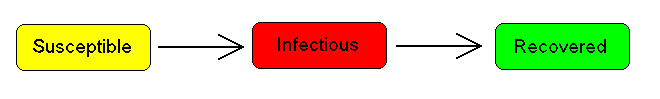

SIR model depends on different sensitive parameters: R0, β , γ and N (population). The basic reproduction number, R0, is defined as the expected number of secondary cases produced by a single (typical) infection in a completely susceptible population. β is the average number of contacts per person per time, multiplied by the probability of disease transmission in a contact between a susceptible and an infectious subject. γ is the rate of recovered or dead, that is, number of recovered or dead during one day divided by the total number of infected on that same day. 







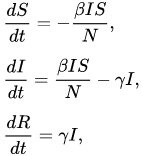

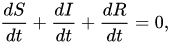

For more information, please ckeck the link below:

[https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_is_dynamic_in_three_senses](http://)

We can create a model for the Spanish population and see how the curve changes when we modify the parameters. As said before, the model is really sensitive to the different parameters so it is not the best solution for our predictions. 


In [ ]:
# # Total population, N.
N = 47000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 ,Tr = 1, 3.5, 10
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = R0/Tr, 1./Tr
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(15,5),facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,47000000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

### Polynomial model by country

Let´s try to create model for each country individually. First, we will create a model for the confrimed cases and then for deaths. We will model a polynomial model of 2nd dregree for both targets. 

Since the dates between March 12 and March 22 are included in the test dataset, that week will be removed from the train dataset.

In [ ]:
corona=corona[(corona["Date"]<"2020-03-12")]

In [ ]:
degree=2
scores=[]

for country in corona['Country/Region'].unique():
    
    country_train = corona[corona['Country/Region']==country]
    country_test = test[test['Country/Region']==country]
        
    X = np.array(range(len(country_train))).reshape((-1,1))
    y = country_train['ConfirmedCases']
  

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    print("Country:", country)
    score = model.score(X, y)
    print("Score:",score)
        
    predict_x = (np.array(range(len(country_test)))+51).reshape((-1,1))
    test.loc[test['Country/Region']==country,'ConfirmedCases'] = model.predict(predict_x)
    
    scores.append(score)
    

In [ ]:
mean(scores)

In [ ]:
degree=2
scores=[]

for country in corona['Country/Region'].unique():
    
    country_train = corona[corona['Country/Region']==country]
    country_test = test[test['Country/Region']==country]
        
    X = np.array(range(len(country_train))).reshape((-1,1))
    y = country_train['Fatalities']
   

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    print("Country:", country)
    score = model.score(X, y)
    print("Score:",score)
        
    predict_x = (np.array(range(len(country_test)))+51).reshape((-1,1))
    test.loc[test['Country/Region']==country,'Fatalities'] = model.predict(predict_x)
    
    scores.append(score)

In [ ]:
mean(scores)

Finally, we will save the results obtained. 

In [ ]:
sol = pd.read_csv('../input/covid19-global-forecasting-week-1/submission.csv')
sol['Fatalities'] = test['Fatalities'].round(0).astype(int)
sol['ConfirmedCases'] = test['ConfirmedCases'].round(0).astype(int)
sol.to_csv('submission.csv',index=False)